In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [2]:
diabetes ,target = load_diabetes(return_X_y=True)

In [4]:
import pandas as pd
import numpy as np
diabetes = pd.DataFrame(diabetes)

C:\Users\Microsoft\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Microsoft\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
y = target 
X = diabetes

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=27)

### Evaluation Metric: R²
R-Squared, or the coefficient of determination, is how much variance in the target variable that is explained by our model.
Values can range from 0 to 1. Higher values indicate a model that is highly predictive. For example, a R² value of 0.80 means that the model is accounting for 80% of the variability in the data.
In general, the higher the R² value the better. Low values indicate that our model is not very good at predicting the target. One caution, however, is that a very high R² could be a sign of overfitting.

In [7]:
from sklearn.model_selection import cross_val_score

In [8]:
def get_cv_scores(model):
    scores = cross_val_score(model,X_train,
                            y_train,
                            cv = 5,
                            scoring = 'r2')
    print("CV Mean: ",np.mean(scores))
    print("STD: ",np.std(scores))
    print()

### Linear Regression (Ordinary Least Squares)
Linear regression finds the parameters to minimize the mean squared error or residuals between the predictions and the targets.
Mean squared error is defined as the sum of the squared differences between the predictions and the true values, divided by the total number of samples.

In [9]:
from sklearn.linear_model import LinearRegression

lr  = LinearRegression()
lr.fit(X_train,y_train)
get_cv_scores(lr)

CV Mean:  0.47582312041372193
STD:  0.14121168360297315



We get a R² value of 0.48 and standard deviation of 0.14. The low R² value indicates that our model is not very accurate. The standard deviation value indicates we may be overfitting the training data.
Overfitting occurs when the model makes much better predictions on known data than on unknown data. The model begins to memorize the training data and is unable to generalize to unseen test data.
One option to combat overfitting is to simplify the model. We’ll attempt to simplify our linear regression model by introducing regularization.
Regularization can be defined as explicitly restricting a model to prevent overfitting.
As linear regression has no parameters, there is no way to control the complexity of the model. We’ll explore some variations that add regularization below.

## Ridge Regression (L2 Regularization)
Ridge regression uses L2 regularization to minimize the magnitude of the coefficients. It reduces the size of the coefficients and helps reduce model complexity.
We control the complexity of our model with the regularization parameter, ⍺.
Higher values of ⍺ force coefficients to move towards zero and increases the restriction on the model. This decreases training performance, but also increases the generalizability of the model. Setting ⍺ too high could lead to a model that is too simple and underfits the data.

In [12]:
from IPython.display import Image

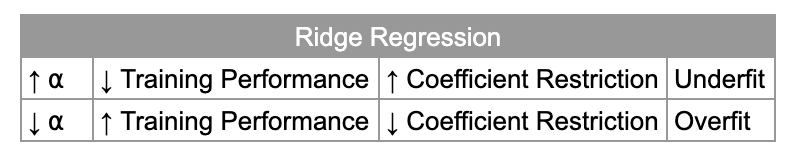

In [14]:
Image("2.png")

In [15]:
from sklearn.linear_model import Ridge

In [16]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train,y_train)

Ridge(alpha=1)

In [17]:
get_cv_scores(ridge)

CV Mean:  0.3826248703036134
STD:  0.09902564009167607



A mean R² score of 0.38 means we are only able to explain 38% of the variance with our Ridge Regression model — definitely not an improvement from linear regression above. However, our standard deviation decreased which suggests we are less likely to be overfitting.

In [18]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha = alpha)

In [19]:
param_grid

{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [21]:
from sklearn.model_selection import GridSearchCV

In [23]:
grid = GridSearchCV(estimator = ridge,param_grid = param_grid,
                   scoring = 'r2',verbose =1,n_jobs = -1)

In [27]:
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    5.2s finished


In [28]:
print('Best Score: ', grid.best_score_)
print('Best Params: ', grid.best_params_)

Best Score:  0.4763815295039408
Best Params:  {'alpha': 0.01}


## Lasso Regression (L1 Regularization)
Lasso regression uses L1 regularization to force some coefficients to be exactly zero. This means some features are completely ignored by the model. This can be thought of as a type of automatic feature selection!
Lasso can be a good model choice when we have a large number of features but expect only a few to be important. This can make the model easier to interpret and reveal the most important features!
Higher values of ⍺ force more coefficients to zero and can cause underfitting.

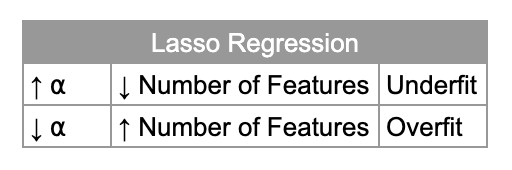

In [29]:
Image("1.png")

In [30]:
from sklearn.linear_model import Lasso
# Train model with default alpha=1
lasso = Lasso(alpha=1).fit(X_train, y_train)
# get cross val scores
get_cv_scores(lasso)

CV Mean:  0.3510033961713952
STD:  0.08727927390128883



In [31]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.4760522440673414
Best Params:  {'alpha': 0.1}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.0s finished


We can examine the coefficients to see if any have been set to zero:

In [33]:
for coef,col in enumerate(X_train.columns):
    print(f'{col}: {lasso.coef_[coef]}')

0: 0.0
1: -0.0
2: 446.0718032546266
3: 0.0
4: 0.0
5: 0.0
6: -0.0
7: 0.0
8: 320.4125856149207
9: 0.0


# Elastic-Net Regression
Elastic-net is a linear regression model that combines the penalties of Lasso and Ridge.

In [34]:
from sklearn.linear_model import ElasticNet
# Train model with default alpha=1 and l1_ratio=0.5
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5).fit(X_train, y_train)

In [35]:
get_cv_scores(elastic_net)

CV Mean:  -0.05139208284143739
STD:  0.07297997198698156



In [36]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)
grid = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best Score:  0.4772292278126552
Best Params:  {'alpha': 0.001, 'l1_ratio': 0.8}


[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:    1.0s finished


Again, after finding optimal hyperparameter values our R² score increased.